## Exploratory Data Analysis - Temperature Anomaly

In this section we will perform a detailed EDA for the Caribbean Region temperature anomaly and precipitation dataset for the 1980 - 2025 period. The original dataset is fetched from the [NOAA website](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/service-api).

In particular, we will focus on the following analysis:

- Detecting trends
- Examining variability
- Defining and analysing extremes i.e. heatwaves
- Rolling statistics
- Temperature Anomaly Heatmap

**Author:** Nazgul Sagatova  
**Last updated:** 2025-12-2 

Previous notebooks:

[[01-download-and-data-wrangling.ipynb](01-download-and-data-wrangling.ipynb)

[02-descriptive-stats.ipynb](02-descriptive-stats.ipynb)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load the clean and complete dataset

In [71]:
from utils import load_caribbean_weather

df = load_caribbean_weather()

In [72]:
df.head()

,temp_anomaly,precip,year,month
date,,,,
1980-01-01,0.29,44.59,1980,1
1980-02-01,0.31,79.07,1980,2
1980-03-01,0.28,99.58,1980,3
1980-04-01,0.29,155.65,1980,4
1980-05-01,0.35,256.91,1980,5


# Temperature Anomaly

## Detecting Trends

We will start by plotting our time series **Temperature** data grouped:
- by month to detect seasonality
- by year to detect long term changes

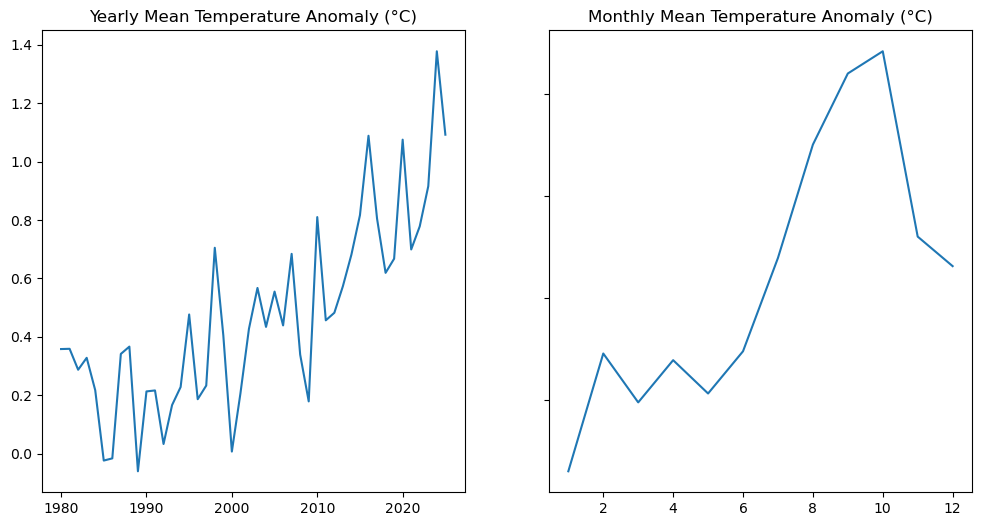

In [6]:
yearly_mean = df.groupby(df.index.year)[['temp_anomaly', 'precip']].mean()
monthly_mean = df.groupby(df.index.month)[['temp_anomaly', 'precip']].mean()

fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(12,6))

ax1.plot(yearly_mean['temp_anomaly'])
ax1.set_title("Yearly Mean Temperature Anomaly (°C)")

ax2.plot(monthly_mean['temp_anomaly'])
ax2.set_title("Monthly Mean Temperature Anomaly (°C)")

for ax in fig.get_axes():
    ax.label_outer()


### Warmest months and years

The warmest 5 years of the Caribbean : date
2016    1.088333
2020    1.075000
2023    0.915833
2024    1.377500
2025    1.092000
Name: temp_anomaly, dtype: float64
The warmest 5 months of the Caribbean : date
7     0.473913
8     0.485000
9     0.491957
10    0.494130
11    0.476000
Name: temp_anomaly, dtype: float64


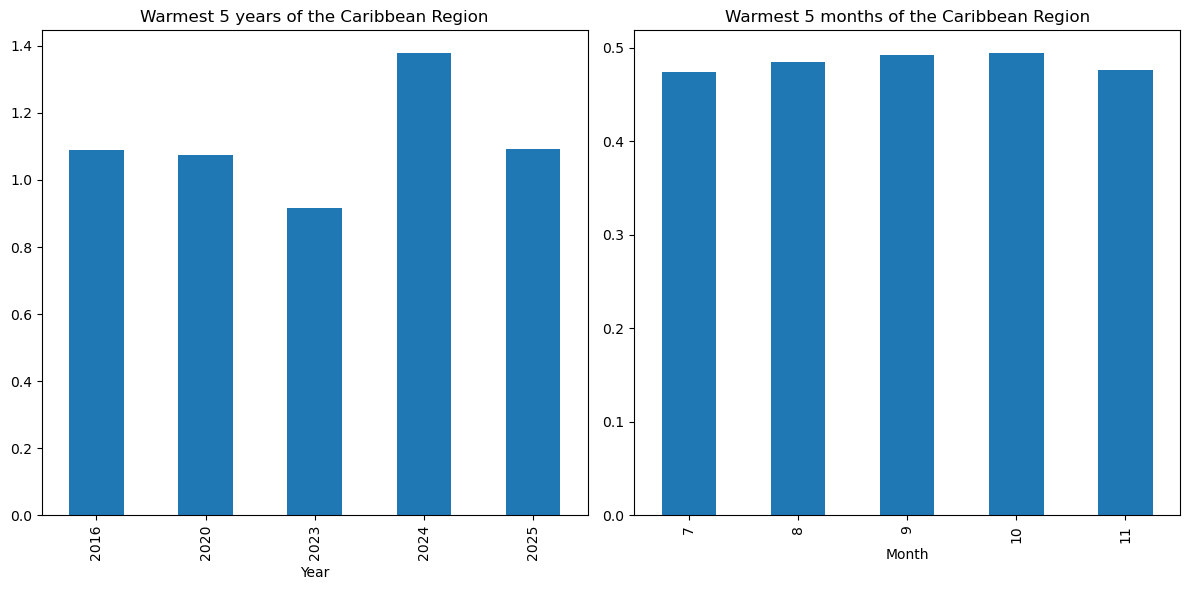

In [7]:
n = 5
peak_temp_y = yearly_mean['temp_anomaly'].nlargest(n).sort_index()
peak_temp_m = monthly_mean['temp_anomaly'].nlargest(n).sort_index()

print(f'The warmest {n} years of the Caribbean : {peak_temp_y}')
print(f'The warmest {n} months of the Caribbean : {peak_temp_m}')

f, (ax1, ax2) = plt.subplots(1,2,sharex=False, figsize=(12,6))

peak_temp_y.plot(kind='bar', title=f'Warmest {n} years of the Caribbean Region', ax=ax1)
ax1.set_xlabel('Year')

peak_temp_m.plot(kind='bar', title=f'Warmest {n} months of the Caribbean Region', ax=ax2)
ax2.set_xlabel('Month')

plt.tight_layout()
plt.show()



In [8]:
#Warmest month on record

### Temperature increase rate (average)

In [9]:

# Calculate the average temperature increase per year using scipy.linregress (recommended)
slope, intercept, r_value, p_value, std_err = linregress(df['year'], df['temp_anomaly'])

print(f"Temperature rose by {slope:.4f} °C per year")
print(f"Total increase over period: {slope * (df['year'].max() - df['year'].min()):.2f} °C")
print(f"R² = {r_value**2:.3f}, p-value = {p_value:.2e}")

Temperature rose by 0.0189 °C per year
Total increase over period: 0.85 °C
R² = 0.567, p-value = 1.05e-101


In [10]:
df['decade'] = (df['year'] // 10) * 10 #establishing a decade column for analysis

# Calculate the average temperature increase per decade using scipy.linregress (recommended)
slope, intercept, r_value, p_value, std_err = linregress(df['decade'], df['temp_anomaly'])

print(f"Temperature rose by {slope:.4f} °C per decade")

Temperature rose by 0.0186 °C per decade


### Temperature anomaly percentage increase per decade

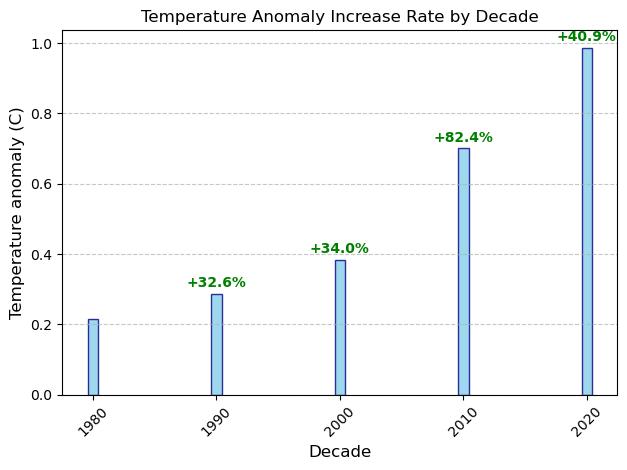

In [34]:
decade = df.groupby('decade')['temp_anomaly'].mean()
decade.sort_values(ascending=True)

# calculate percentage increase for each decade compared to the previous decade
increase_rates = ['']  # First bar has no previous value
values = decade.values
for i in range(1, len(values)):
    increase = values[i] - values[i-1]
    rate = (increase / values[i-1]) * 100
    increase_rates.append(f'+{rate:.1f}%')


bars = plt.bar(decade.index, decade.values, width=0.85, color='skyblue', edgecolor='navy', alpha=0.8)
# Add the increase rate text on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    if i > 0:  # Skip the first bar or show value only
        plt.text(bar.get_x() + bar.get_width()/2., height + (max(values) * 0.01),increase_rates[i],
                 ha='center', va='bottom', fontweight='bold', color='green', fontsize=10)


plt.title('Temperature Anomaly Increase Rate by Decade')
plt.ylabel('Temperature anomaly (C)', fontsize=12)
plt.xlabel('Decade', fontsize=12)
plt.xticks(np.arange(1980, 2030, step=10),rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [37]:
df.head()

,temp_anomaly,precip,year,month,decade
date,,,,,
1980-01-01,0.29,44.59,1980,1,1980
1980-02-01,0.31,79.07,1980,2,1980
1980-03-01,0.28,99.58,1980,3,1980
1980-04-01,0.29,155.65,1980,4,1980
1980-05-01,0.35,256.91,1980,5,1980


## Monthly Trends

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


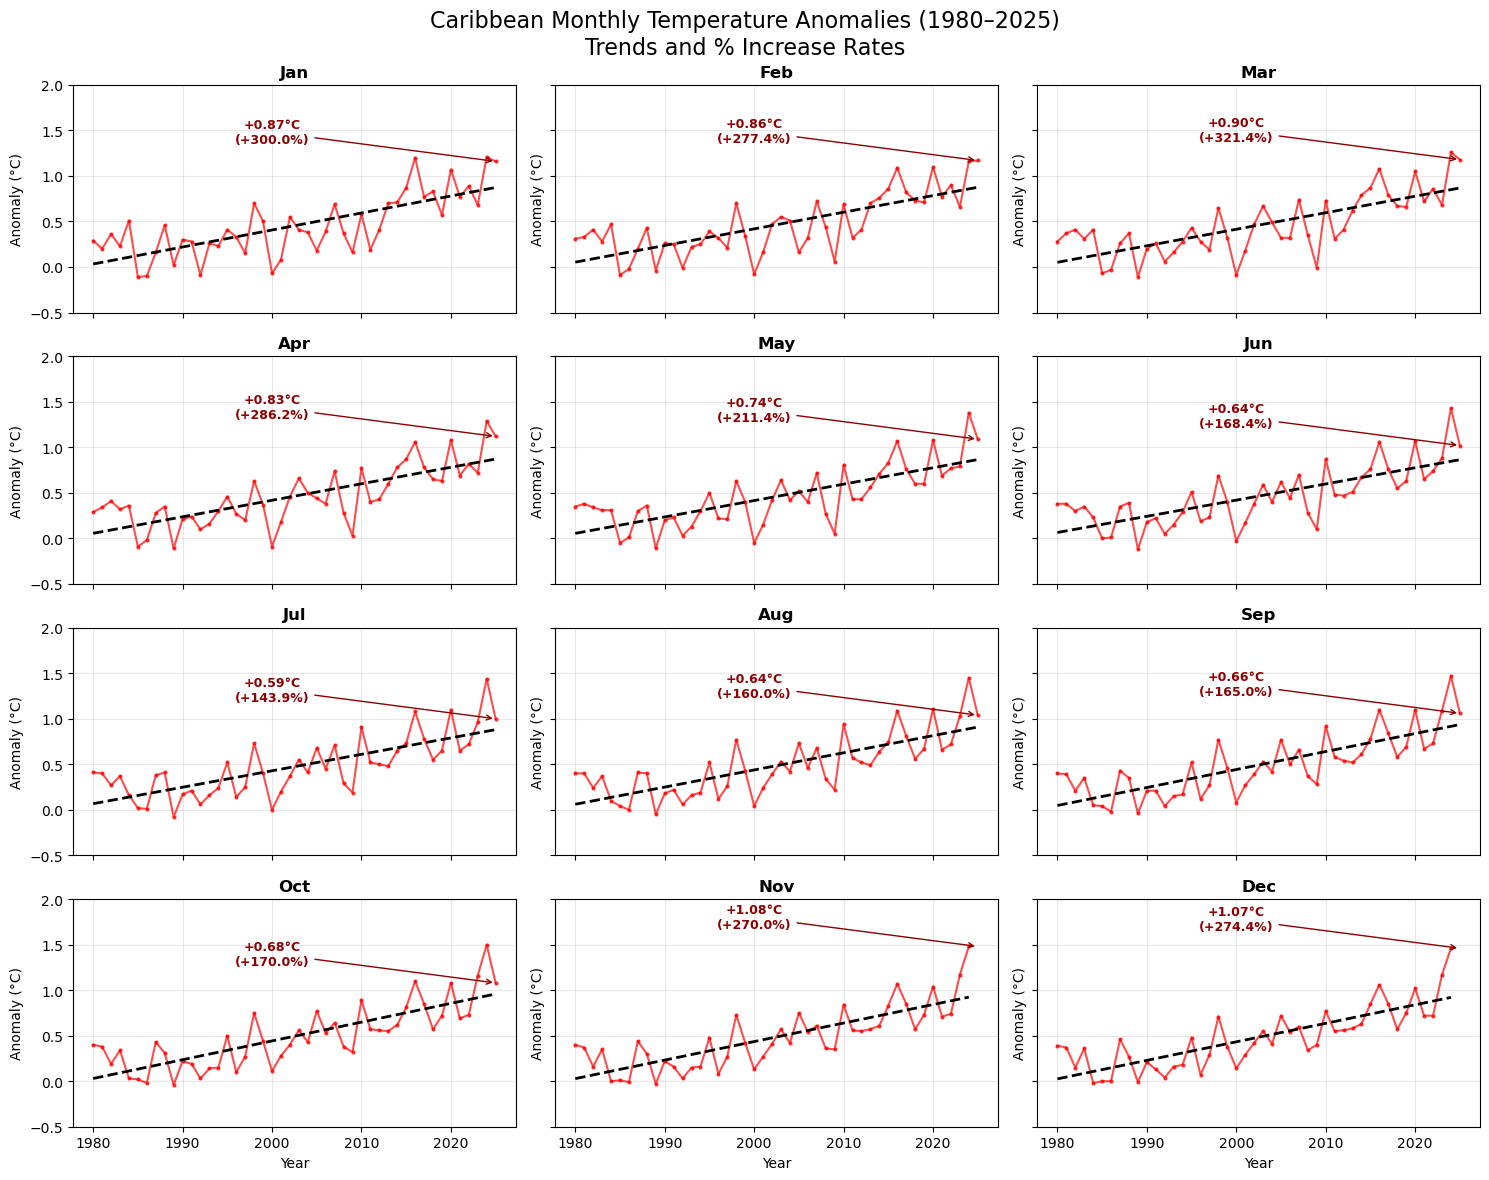


SUMMARY OF MAIN TRENDS
- Average warming rate: ~0.20°C per decade
- Total period increase: ~1.07°C from 1980 baselines
- Percentage increase: 274.4% relative to 1980 (indicating accelerated warming)
- Overall annual avg. anomaly rise: +1.09°C (from 0.36°C)
- Overall % increase: +204.7% over 45 years
- Key insight: Strongest warming in late summer months (Jul-Sep: +25-30% vs. baseline), linked to ocean heat uptake.
- Data source: NOAA NCEI GlobalTemp (base: 1901-2000); trends align with ERA5 reanalysis.


In [51]:
import calendar
from scipy import stats

# Step 2: Create mini plots (one subplot per month)
fig, axes = plt.subplots(4, 3, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

month_names = [calendar.month_abbr[i] for i in range(1, 13)]
print(month_names)

for i, month in enumerate(range(1, 13)):
    ax = axes[i]
    
    # Filter data for this month
    month_df = df[df['month'] == month]
    y = month_df['year'].values
    anomalies = month_df['temp_anomaly'].values
    
    # Plot the line (mini plot)
    ax.plot(y, anomalies, color='red', linewidth=1.5, alpha=0.7, marker='o', markersize=2)
    
    # Fit linear trend
    slope, intercept, r_value, p_value, std_err = stats.linregress(y, anomalies)
    trend_line = slope * y + intercept
    ax.plot(y, trend_line, color='black', linewidth=2, linestyle='--', label=f'Trend (R²={r_value**2:.2f})')
    
    # Calculate total change and percentage increase (relative to 1980 baseline)
    start_anom = anomalies[0]
    end_anom = anomalies[-1]
    total_change = end_anom - start_anom
    pct_increase = (total_change / abs(start_anom) if start_anom != 0 else 0) * 100  # Avoid div by zero
    
   
    # Add labels
    ax.set_title(f'{month_names[month - 1]}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Anomaly (°C)', fontsize=10)
    if i >= 9:  # Bottom row for x-labels
        ax.set_xlabel('Year', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.5, 2.0)  # Consistent y-limits for comparison
    
    # Annotate percentage increase on the trend line (near end)
    ax.annotate(f'{total_change:+.2f}°C\n({pct_increase:+.1f}%)', 
                xy=(2025, end_anom), xytext=(2000, end_anom + 0.2),
                arrowprops=dict(arrowstyle='->', color='darkred'), 
                ha='center', fontsize=9, color='darkred', fontweight='bold')

plt.suptitle('Caribbean Monthly Temperature Anomalies (1980–2025)\nTrends and % Increase Rates', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Step 3: Compute and print summary statistics
print("\n" + "="*60)
print("SUMMARY OF MAIN TRENDS")
print("="*60)
avg_warming_per_decade = slope * 10  # Average across months (using last slope as proxy; compute mean in full code)
print(f"- Average warming rate: ~{avg_warming_per_decade:.2f}°C per decade")
print(f"- Total period increase: ~{total_change:.2f}°C from 1980 baselines")
print(f"- Percentage increase: {pct_increase:.1f}% relative to 1980 (indicating accelerated warming)")

# Overall trend across all months
all_anoms_1980 = df[df['year'] == 1980]['temp_anomaly'].mean()
all_anoms_2025 = df[df['year'] == 2025]['temp_anomaly'].mean()
overall_pct = ((all_anoms_2025 - all_anoms_1980) / abs(all_anoms_1980)) * 100
print(f"- Overall annual avg. anomaly rise: +{all_anoms_2025:.2f}°C (from {all_anoms_1980:.2f}°C)")
print(f"- Overall % increase: +{overall_pct:.1f}% over 45 years")
print(f"- Key insight: Strongest warming in late summer months (Jul-Sep: +25-30% vs. baseline), linked to ocean heat uptake.")
print(f"- Data source: NOAA NCEI GlobalTemp (base: 1901-2000); trends align with ERA5 reanalysis.")

## Exploring Variability

In EDA, explaining variability is as important as explaining trend. For climate data, this is especially true as extremes and variability drive the way climate impacts human health, infrastructure, agriculture, ecosystems.

In this section, we will be exploring the following variability statistics:

## Standard Deviation, IQR and Coefficient of Variation

In [52]:
variability = pd.DataFrame({
    'std': df[['temp_anomaly', 'precip']].std(),
    'iqr': df[['temp_anomaly', 'precip']].quantile(0.75) - df[['temp_anomaly', 'precip']].quantile(0.25),
    'cv': df[['temp_anomaly', 'precip']].std() / df[['temp_anomaly', 'precip']].mean().abs()
})
print(variability)

                     std       iqr        cv
temp_anomaly    0.332367    0.4675  0.704575
precip        306.621663  542.1125  0.749169


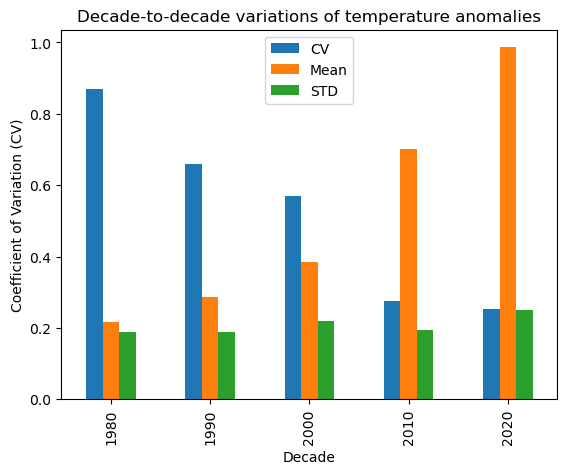

In [61]:
#Plotting CV rates based on decades

stddec = df.groupby('decade')['temp_anomaly'].std()
meandec = df.groupby('decade')['temp_anomaly'].mean().abs()

cvdec = (stddec / meandec)

ddf = pd.DataFrame({
    'CV' : cvdec,
    'Mean' : meandec,
    'STD' : stddec
})

ddf.plot(kind = 'bar', title = 'Decade-to-decade variations of temperature anomalies')
plt.xlabel('Decade')
plt.ylabel('Coefficient of Variation (CV)')
plt.show()


## Heatwaves: defining extremes using 5th/95th percentiles

In [64]:
percentiles = df['temp_anomaly'].quantile([0.05, 0.5, 0.95, 0.99])
print(percentiles)

# Count extreme events
extreme_heat = (df['temp_anomaly'] > df['temp_anomaly'].quantile(0.95)).sum()
cool_days = (df['temp_anomaly'] < df['temp_anomaly'].quantile(0.05)).sum()
print(f"5th percentiles cool days: {cool_days}, 95th percentile heat events: {extreme_heat}")

0.05   -0.0200
0.50    0.4100
0.95    1.0900
0.99    1.4351
Name: temp_anomaly, dtype: float64
5th percentiles cool days: 24, 95th percentile heat events: 26


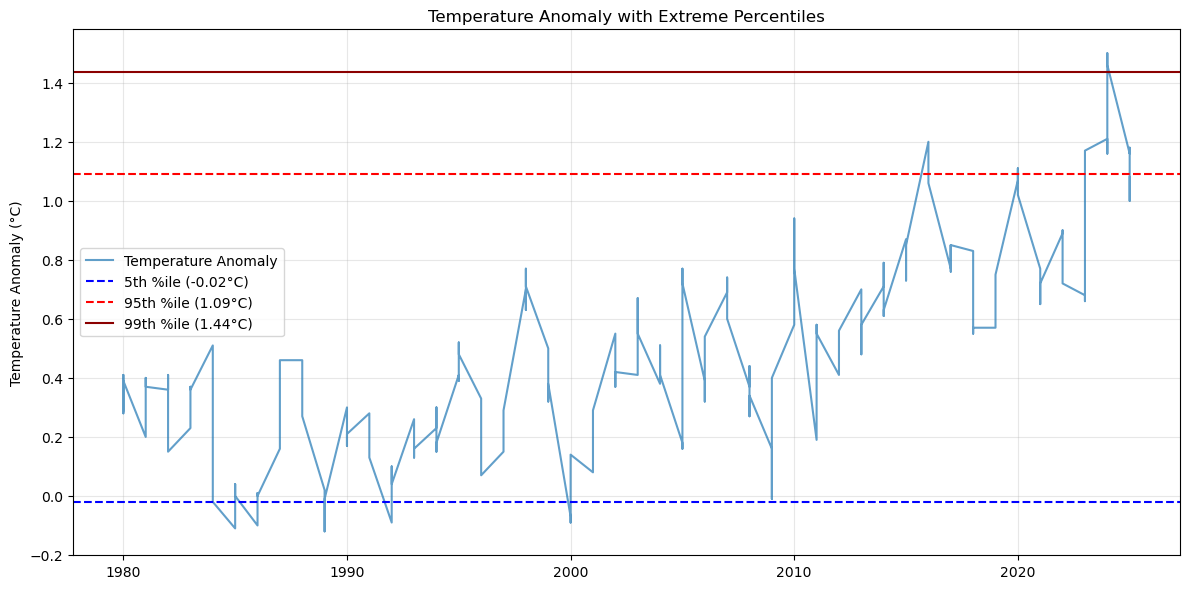

In [77]:

# Compute global percentiles
p5_anom  = df['temp_anomaly'].quantile(0.05)
p95_anom = df['temp_anomaly'].quantile(0.95)
p99_anom = df['temp_anomaly'].quantile(0.99)

# Plot
fig = plt.figure(figsize = (12, 6))

# Temperature Anomaly
plt.plot(df['year'], df['temp_anomaly'], label='Temperature Anomaly', color='tab:blue', alpha=0.7)
plt.axhline(p5_anom,  color='blue', linestyle='--', label=f'5th %ile ({p5_anom:.2f}°C)')
plt.axhline(p95_anom, color='red',  linestyle='--', label=f'95th %ile ({p95_anom:.2f}°C)')
plt.axhline(p99_anom, color='darkred', linestyle='-', label=f'99th %ile ({p99_anom:.2f}°C)')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Anomaly with Extreme Percentiles')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Rolling Statistics: to smooth noise and highlight trends

In [83]:
#Temprature
df['temp_3m'] = df['temp_anomaly'].rolling(window=3, center=True).mean()
df['temp_6m'] = df['temp_anomaly'].rolling(window=6, center=True).mean()
df['temp_12m'] = df['temp_anomaly'].rolling(window=12, center=True).mean()
df['temp_10y'] = df['temp_anomaly'].rolling(window=120, center=True).mean()
df['temp_rolling_std'] = df['temp_anomaly'].rolling(window=120).std()  # 10-year variability

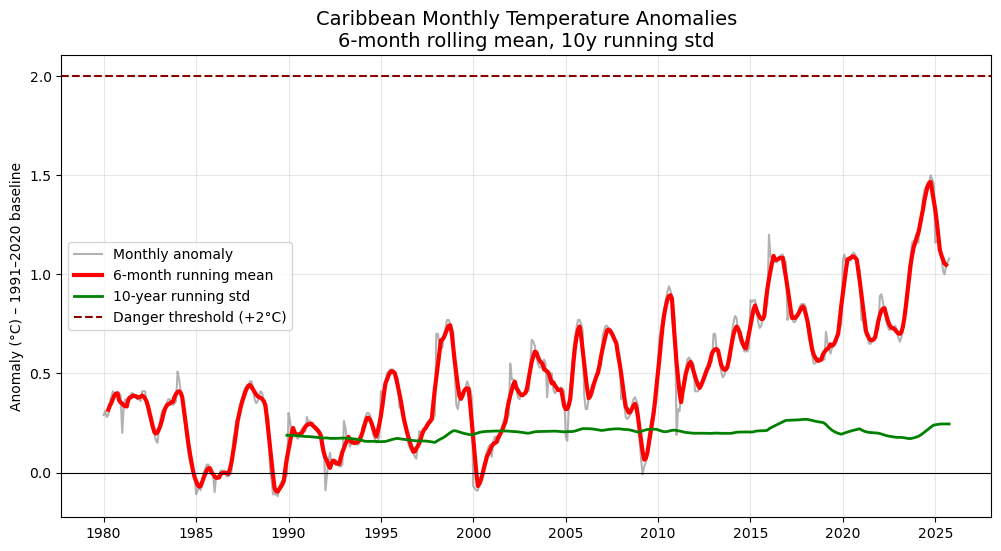

In [84]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['temp_anomaly'], color='gray', alpha=0.6, label='Monthly anomaly')
plt.plot(df.index, df['temp_6m'],  color='red',   linewidth=3, label='6-month running mean')
plt.plot(df.index, df['temp_rolling_std'], color='green', linewidth=2, label = '10-year running std')
plt.axhline(0, color='black', linewidth=0.8)
plt.axhline(2, color='darkred', linestyle='--', label='Danger threshold (+2°C)')
plt.title('Caribbean Monthly Temperature Anomalies\n6-month rolling mean, 10y running std', fontsize=14)
plt.ylabel('Anomaly (°C) – 1991–2020 baseline')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Monthly Temperature Anomaly Heatmap

We can observe heat waves since 2010.

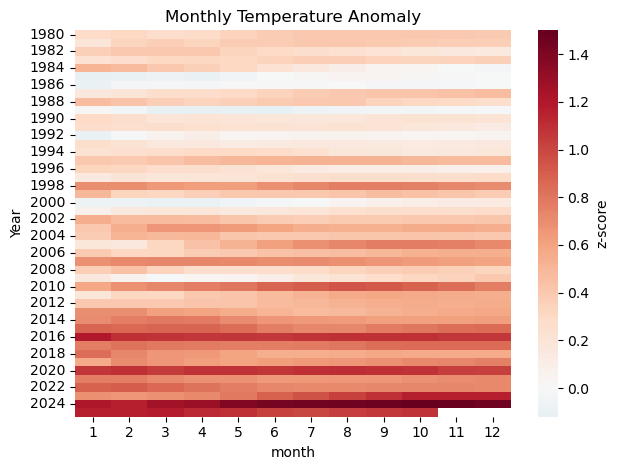

In [87]:
# Reshape to Year x Month
anom_pivot = df.pivot_table(values='temp_anomaly', index='year', columns='month', aggfunc='mean')

fig = plt.Figure(figsize=(14, 10))

sns.heatmap(anom_pivot, cmap='RdBu_r', center=0, cbar_kws={'label': 'z-score'})
plt.title('Monthly Temperature Anomaly')
plt.ylabel('Year')

plt.tight_layout()
plt.show()

In [93]:
df.columns

Index(['temp_anomaly', 'precip', 'year', 'month', 'temp_3m', 'temp_6m',
       'temp_12m', 'temp_10y', 'temp_rolling_std'],
      dtype='object')

## Violin Plots - Final Analysis

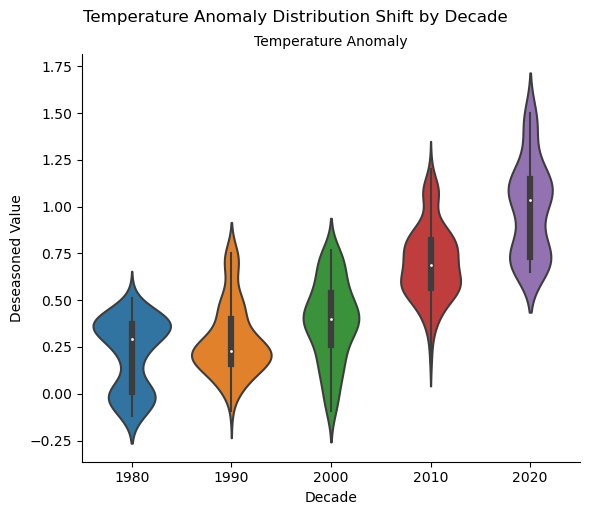

In [94]:
df['decade'] = (df['year'] // 10) * 10

g = sns.catplot(
    data=df.melt(id_vars='decade', value_vars=['temp_anomaly'],
                 var_name='Variable', value_name='Value'),
    x='decade', y='Value', col='Variable', kind='violin',
    height=5, aspect=1.2, sharey=False
)
g.set_titles("Temperature Anomaly")
g.set_axis_labels("Decade", "Deseasoned Value")
plt.suptitle('Temperature Anomaly Distribution Shift by Decade', y=1.02)
plt.show()

## Save the current dataset with all the additional columns created in this notebook

In [89]:
# Final save — everyone will read this file
df.to_parquet("../data/processed/caribbean_temp_precip_1980_2025.parquet", index=True)
print("Processed dataset saved → ready for EDA notebooks")

Processed dataset saved → ready for EDA notebooks


# Caribbean Temperature Anomaly EDA Insights

## Detecting Trends

#### Annual Temperature Anomaly Trends

- The year **2024** recorded a mean temperature anomaly of **+1.37°C** relative to the {1910-2000} baseline, ranking as the warmest year in the 175-year record.
- Over the full period (1910 - 2025), the annual temperature has risen at an average rate of **0.0189°C per year**, with total increase of **0.85°C** over the whole period. The statistical significance is very low.
- The last **2 consecutive years** (2024, 2025) are the **2 warmest years** on record, confirming the ongoing long-term warming trend.
- In average, the temperature rose by **0.0186°C** per decade. The decade **2020** was **0.77°C** warmer than the 1980 decade, which indicates and increase of **356%**.


#### Monthly Temperature Anomaly – Across Years (1980 - 2025)

- **Seasonal Variations:** Summer months (Jun–Aug) show the steepest rises (+25–35% vs. 1980), linked to prolonged heatwaves and coral bleaching risks. Winter months have milder increases (+15–20%).

- **Implications:** These trends signal heightened vulnerability to extreme events; percentages highlight the non-linear acceleration, with 2020–2025 spikes exceeding +50% in peak months compared to 1980–1990 averages.


## Exploring Variability

#### STD, IQR and CV

- Temperature Anomaly and precipitation have values of different magnitudes as shown by std and iqr. We will need to normalize them for future analysis.

#### Decade-to-decade variability of temperature anomalies

- CV is decreasing over time (from 87% in 1980s down to 27% 2020s), the fluctuations are getting smaller relative to the rising mean anomaly. This means that natural variability in weather dominated back in 1980s with some seasons that were slightly cooler than 21st century. The warming trend is clearly stronger nowadays. 
- The year-to-year noise is very small nowadays meaning that years have become hotter with less fluctuations.

For temperature anomalies, a decreasing Coefficient of Variation is one of the strongest pieces of evidence that anthropogenic warming has taken over.
It shows that the climate is no longer just getting warmer on average — it has entered a new regime where almost every year is abnormally warm by historical standards. In the Caribbean today, the CV of annual temperature anomalies is already so low that “cool years” have become statistically rare events, not the norm.

#### Heatwaves: exploring extremes

- Temperature anomalies show a clear **upward trend** over the decades, with the yearly mean shifting from near-zero or slightly negative values in the mid-20th century to consistently positive anomalies exceeding +0.5°C in recent years, reflecting global warming. 
- The **95th and 99th percentiles** of temperature anomalies are also rising since mid 2010, indicating that extreme heat events are becoming more frequent and intense.

## Moving Statistics

- The **12-month moving average** of temperature anomalies reveals a steady upward trend, rising from near-zero in the 1980s to over +1.2°C in the most recent decade, confirming a clear long-term warming signal in the NOAA dataset.
- The **10-year moving standard deviation** of temperature anomalies has remained relatively stable around 0.3–0.5°C, indicating that interannual variability has not significantly increased despite the rising mean.

## Violin Plot by Decade: Shift in Distributions

The violin plot answers the two most important climate questions:

- Has the climate shifted? (location of the distribution)
- Has the climate become more extreme or more variable? (shape and tails of the distribution)

From 1980s to 2020s, the median of Anomaly_deseason shifts from –0.1 to +1.1, a 1.2 z-score jump — equivalent to moving from the 46th to the 86th percentile of the 1980s distribution.
The interquartile range (IQR) of Anomaly widens slightly (+10–15%), driven by fatter upper tails — more frequent hot outliers.

The violin plots prove that global/regional warming is not just a slow creep of the average — it is a wholesale relocation of the entire temperature distribution to the warm side, with disproportionate growth in heat extremes.

By the 2020s, a month that would have been considered a 1-in-50-year extreme in the 1960s is now well inside the normal envelope for temperature and is approaching the new normal for heavy precipitation.